# Context-free grammars

In [1]:
from tock import *

## Creating CFGs

You can create a CFG either by reading from a file (using `Grammar.from_file`) or a list of strings (using `Grammar.from_lines`). The first rule's left-hand side is assumed to be the start symbol.

In [2]:
g = Grammar.from_lines(["S -> a T b",
                        "S -> b",
                        "T -> T a",
                        "T -> &"])
g

In [3]:
g.nonterminals

{'S', 'T'}

A `Grammar` can be any unrestricted (type-0) grammar, but currently the grammar-reading functions can only read CFGs.

In [4]:
g.is_contextfree()

True

Like `RegularExpression` objects, there isn't a lot you can do with `Grammar` objects other than convert them to automata.

## From CFGs to PDAs

To convert to a PDA using a top-down construction, use the `from_grammar` function:

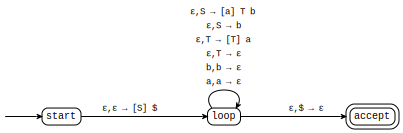

In [5]:
m = from_grammar(g)
to_graph(m)

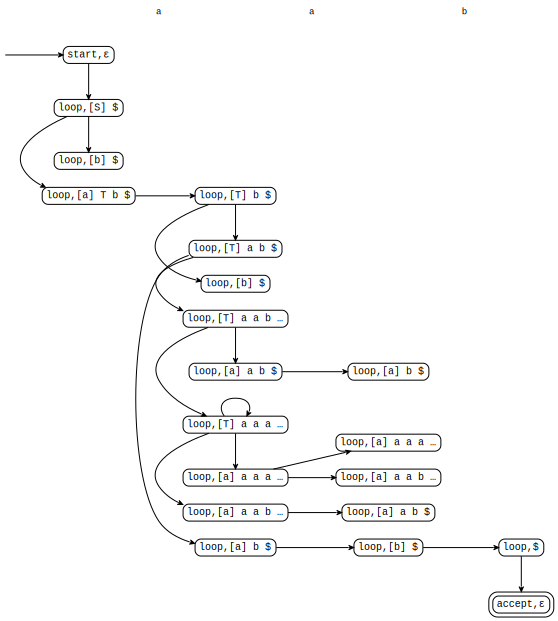

In [6]:
run(m, "a a b", show_stack=4)

This diagram is a little hard to read, but one thing to note is the cycle between `loop` and `3.1`. This is caused by the left-recursive rule `T -> T a`, which the automaton applies an unbounded number of times.

### Shift-reduce parsing

There's also a bottom-up version:

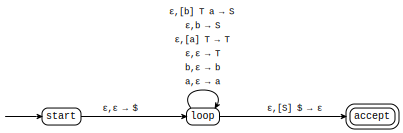

In [7]:
m = from_grammar(g, mode="bottomup")
to_graph(m)

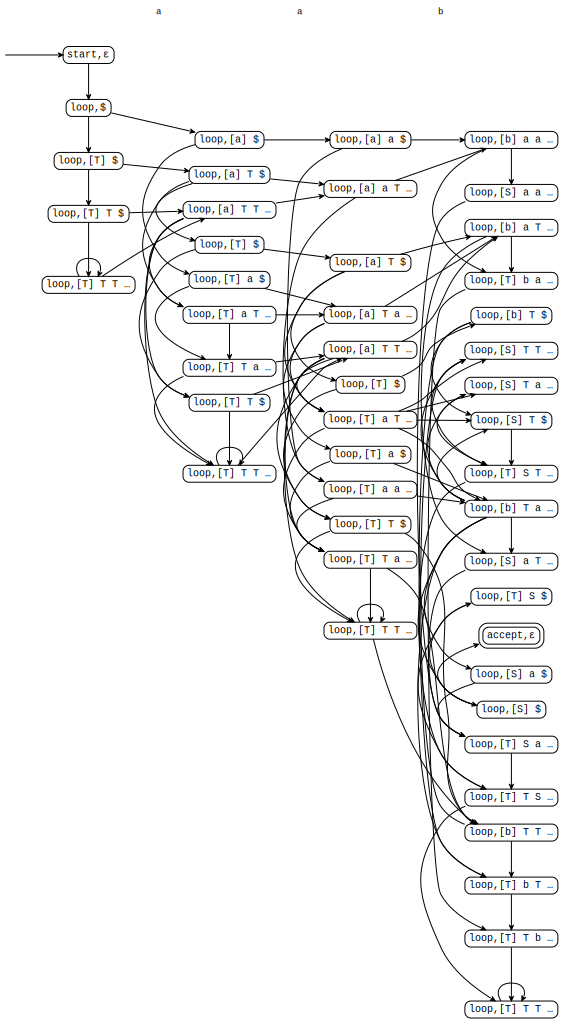

In [8]:
run(m, "a a b")

### LL(1) parsing

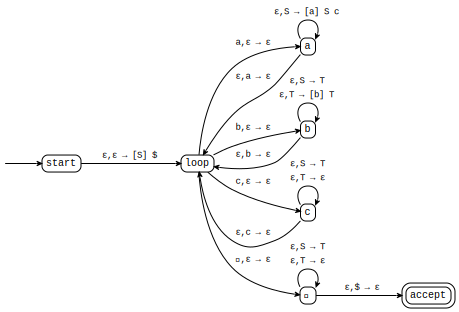

In [9]:
g = Grammar.from_lines(["S -> a S c",
                        "S -> T",
                        "T -> b T",
                        "T -> &"])

m = from_grammar(g, mode='ll1')
m

In [10]:
m.is_deterministic()

True

In [11]:
run(m, "a a b c c", show_stack=5).only_path()

start,[a] a b c c,ε
loop,[a] a b c c,[S] $
a,[a] b c c,[S] $
a,[a] b c c,[a] S c $
loop,[a] b c c,[S] c $
a,[b] c c,[S] c $
a,[b] c c,[a] S c c $
loop,[b] c c,[S] c c $
b,[c] c,[S] c c $
b,[c] c,[T] c c $
b,[c] c,[b] T c c $


### LR parsing

Construction of an LR parser involves building the *LR automaton*:

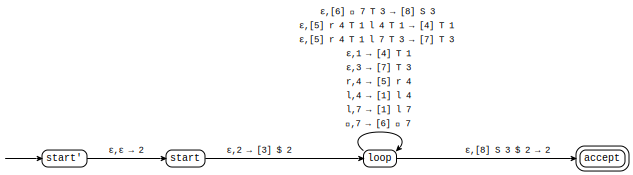

In [17]:
g = Grammar.from_lines([
    'S -> T -|',
    'T -> T l T r',
    'T -> &'
])

m = from_grammar(g, mode='lr0')
m

In [14]:
m.is_deterministic()

True

In [15]:
run(m, 'l l r l r r -|', show_stack=15).only_path()

start',[l] l r l r r ⊣,ε
start,[l] l r l r r ⊣,2
loop,[l] l r l r r ⊣,[3] $ 2
loop,[l] l r l r r ⊣,[7] T 3 $ 2
loop,[l] r l r r ⊣,[1] l 7 T 3 $ 2
loop,[l] r l r r ⊣,[4] T 1 l 7 T 3 $ 2
loop,[r] l r r ⊣,[1] l 4 T 1 l 7 T 3 $ 2
loop,[r] l r r ⊣,[4] T 1 l 4 T 1 l 7 T 3 $ 2
loop,[l] r r ⊣,[5] r 4 T 1 l 4 T 1 l 7 T 3 $ 2
loop,[l] r r ⊣,[4] T 1 l 7 T 3 $ 2
loop,[r] r ⊣,[1] l 4 T 1 l 7 T 3 $ 2


You can visualize the LR automaton using `grammars.lr_automaton`, and you can also build an LR(1) parser using `mode='lr1'`.

## From PDAs to CFGs

The conversion in the reverse direction, from PDA to CFG, is actually related to the algorithm that Tock uses internally to simulate PDAs. We use the `remove_useless` method to reduce the size of the converted CFG.

In [16]:
m = read_csv('examples/sipser-2-14.csv')
g = to_grammar(m).remove_useless()
g